# Задача 1.3

Проанализировать консервативность $z$-критерия для корреляции Пирсона в зависимости от:
* Мощности выборки;
* Проверяемого значения коэффициента корреляции;

**Напоминание : Z-тест позволяет проверять не только соответствие корреляции нулю, но и производить сопоставление с произвольным значением корреляции.**

In [46]:
import matplotlib.pylab as plt

# параметр для задания толщины линии
plt.rcParams['lines.linewidth'] = 1
# параметр для задания ширины точек
plt.rcParams['lines.markersize'] = 6
# параметр для задания шрифта осей x и y (цифр на осях)
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
# параметр для задания шрифта на осях 
plt.rcParams['legend.fontsize'] = 24
# параметр для задания шрифта заголовка
plt.rcParams['axes.titlesize'] = 24
# параметр для задания шрифта осей x и y (название оси)
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['figure.figsize'] = (16.0, 8.0)
# параметр для задания шрифта вспомагательных записей на графику (annotate или text)
plt.rcParams['font.size'] = 10

Будем использовать z-критерий и преобразования Фишера.

Рассмотрим задачу нахождения корреляции Пирсона для двух случайных величин:

$X_1 \sim \mathcal{N}(0,1), \qquad X_2 = X_1 + \alpha\varepsilon, \quad \varepsilon \sim\mathcal{N}(0,1)$

$\|X_1\|=\|X_2\|=10$

$\alpha = 0.5$

In [95]:
import numpy as np

n = 10
alpha = 0.5
mean1 = mean2 = 0
disp1 = 1
disp2 = 1 + alpha**2
corr = 1.0/np.sqrt(disp2)

print(corr, disp2)

0.8944271909999159 1.25


### Аналогично 5-му семинару используем проверку гипотезы о независимости:

In [114]:
import scipy.stats as st

def z_test(N, noise=2, alpha=0.05, given_correlation=0, printed=True):
    results_z = []
    corr = 1.0/np.sqrt(1+noise**2)
    for _ in range(1000):
        data1 = np.random.randn(N)
        data2 = data1 + noise*np.random.randn(N)
        
        pearson = st.pearsonr(data1, data2)[0]
        if pearson == 1.:
            pearson = 0.99999

        # Преобразование Фишера
        Z = (np.arctanh(pearson) - np.arctanh(given_correlation))*np.sqrt(n-3)
        z_pval = 2*(1 - st.distributions.norm.cdf(abs(Z)))

        z_res = z_pval <= 0.05
        results_z.append(z_res)
        
    if printed:
        print('Power:', N, 'Noise:', noise, 'Real_cor:', corr.round(3), "COR:", given_correlation.round(3), 'RES:', np.mean(results_z).round(3))
    return np.mean(results_z)

**Из лекций: критерий  конcервативен, если ошибка I-го рода не превосходит $\alpha$.**

## Используем поправку множественного тестирования Бенджамина Хохберга

In [100]:
from statsmodels.stats.multitest import multipletests

def bh_test(N, noise=2, alpha=0.05, given_correlation=0, printed=True):
    results_z = []
    corr = 1.0/np.sqrt(1+noise**2)
    for _ in range(1000):
        data1 = np.random.randn(N.astype(int))
        data2 = data1 + noise*np.random.randn(N.astype(int))
        
        pearson = st.pearsonr(data1, data2)[0]
        if pearson == 1.:
            pearson = 0.99999

        # Преобразование Фишера
        Z = (np.arctanh(pearson) - np.arctanh(given_correlation))*np.sqrt(n-3)
        z_pval = 2*(1 - st.distributions.norm.cdf(abs(Z)))

        #z_res = z_pval <= 0.05
        results_z.append(z_pval)
        
    r = multipletests(results_z, alpha=alpha, method='fdr_bh')[0]
        
    if printed:
        print('Power:', N, 'Noise:', noise, 'Real_cor:', corr.round(3), "Correlation:", given_correlation.round(3), 'Res:', (1 -r.sum())/1000)
    return (1 -r.sum())/1000

In [108]:
res = []
noise = 2
corr = 1.0/np.sqrt(1+noise**2)

for N in np.linspace(10, 1000, 50):
    res.append(bh_test(N, given_correlation = corr))    

Power: 10.0 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 30.20408163265306 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 50.40816326530612 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 70.61224489795919 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 90.81632653061224 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 111.0204081632653 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 131.22448979591837 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 151.42857142857142 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 171.6326530612245 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 191.83673469387756 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 212.0408163265306 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 232.24489795918367 Noise: 2 Real_cor: 0.447 Correlation: 0.447 Res: 0.001
Power: 252.44897959183675 Noise: 2 Real_cor: 0.44

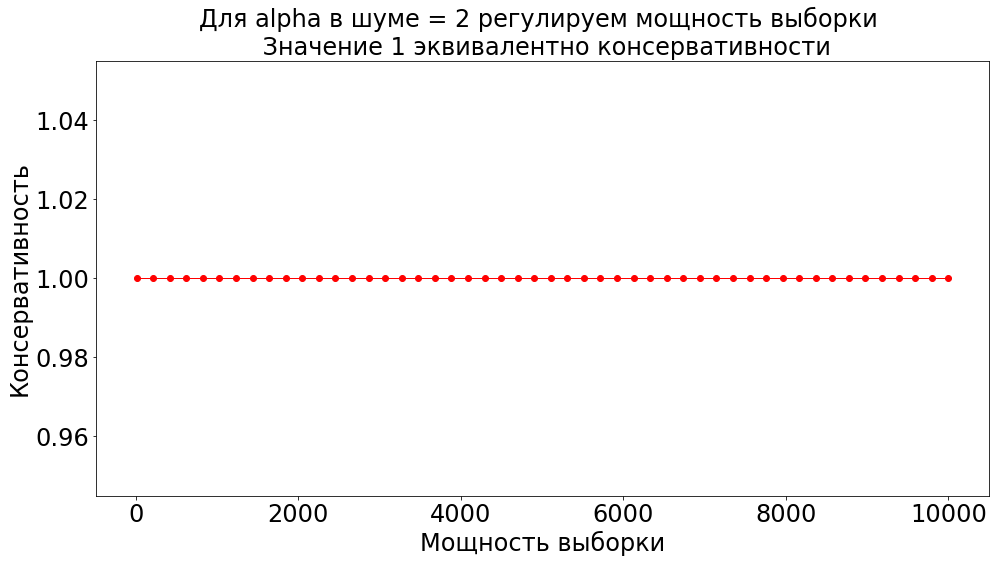

In [102]:
plt.plot(np.linspace(10, 1000, 50), np.where(np.array(res) <= 0.05, 1, 0), 'ro-')
plt.xlabel('Мощность выборки')
plt.ylabel('Консервативность')
plt.title('Для alpha в шуме = ' + str(noise) + ' регулируем мощность выборки \n Значение 1 эквивалентно консервативности')
plt.show()

Критерий всегда консервативен. Никакого тренда не проглядывается.

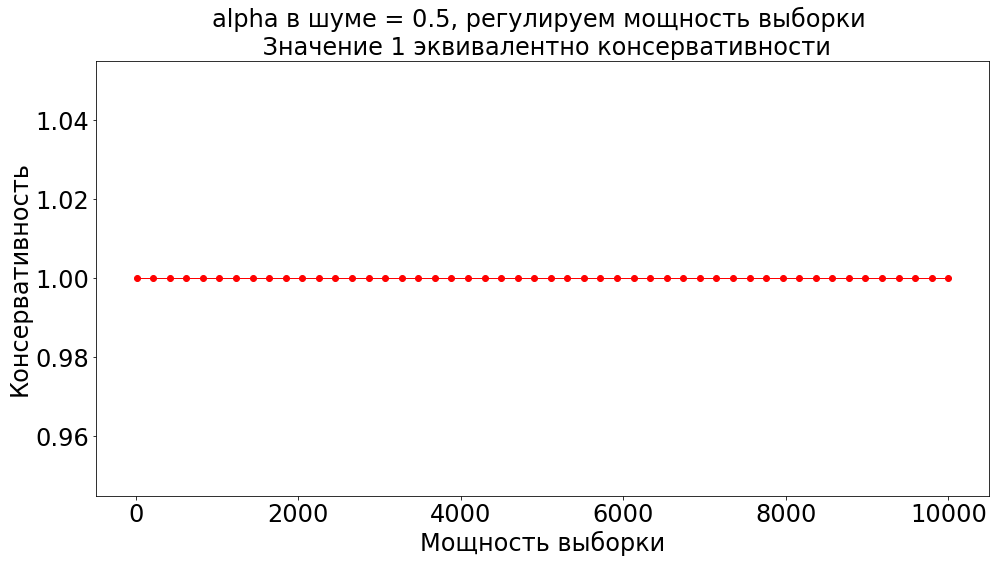

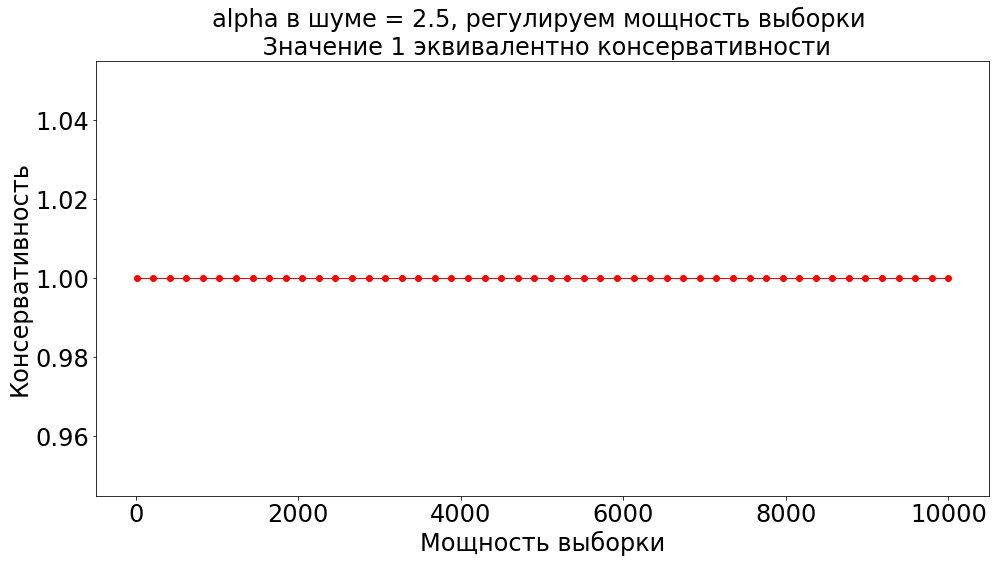

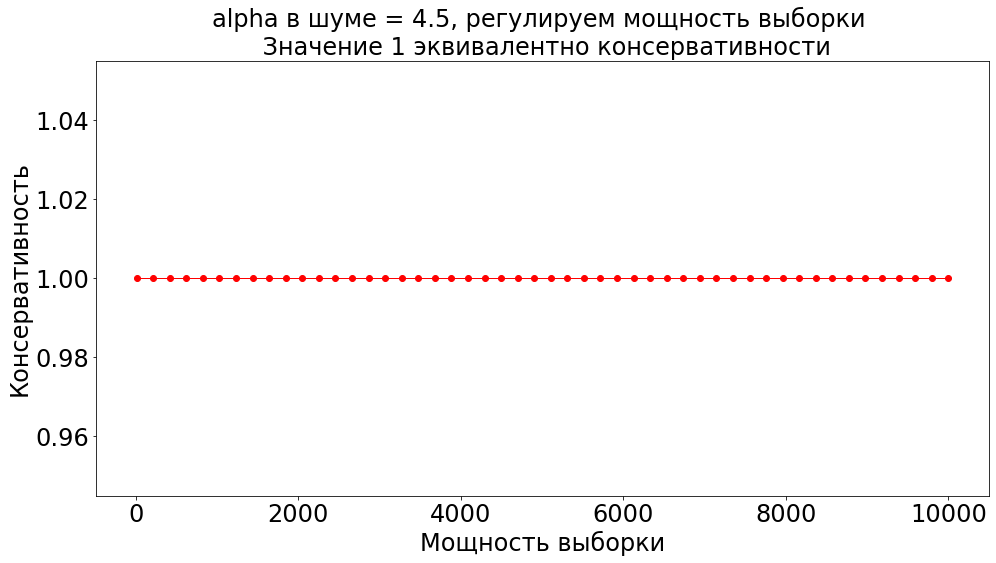

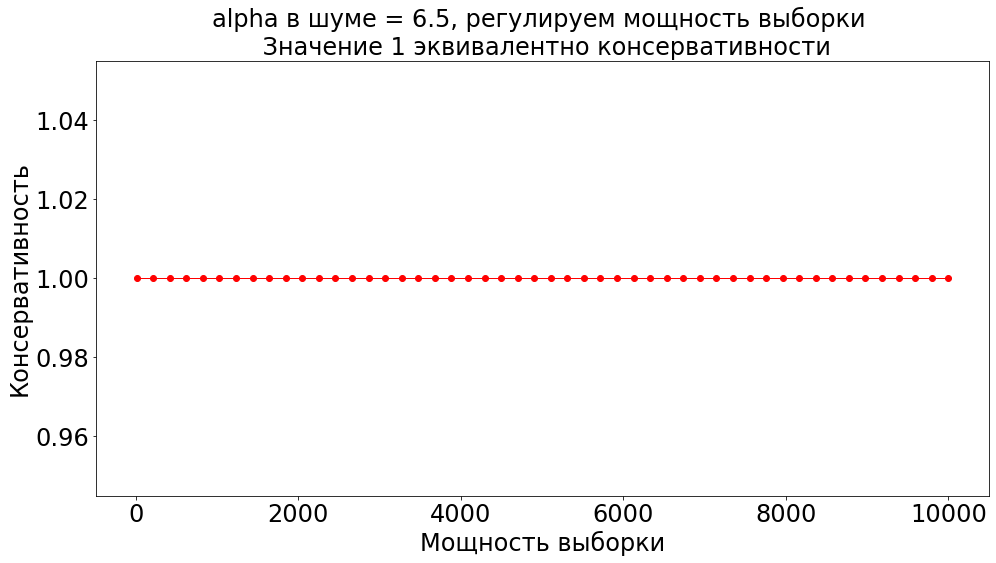

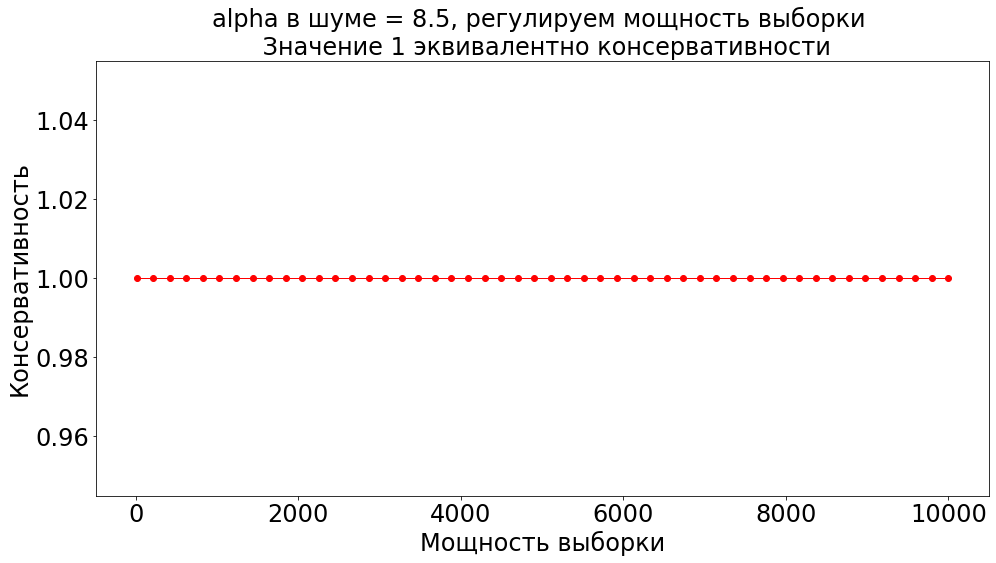

In [103]:
noises = np.arange(0.5, 10.0, 2)

for noise in noises:
    res = []
    corr = 1.0/np.sqrt(1+noise**2)

    for N in np.linspace(10, 1000, 50):
        res.append(bh_test(N, noise=noise, given_correlation = corr, printed=False))
    
    plt.plot(np.linspace(10, 1000, 50), np.where(np.array(res) <= 0.05, 1, 0), 'ro-')
    plt.xlabel('Мощность выборки')
    plt.ylabel('Консервативность')
    plt.title('alpha в шуме = ' + str(noise) + ', регулируем мощность выборки \n Значение 1 эквивалентно консервативности')
    plt.show()

Шо-то как-то никак: универсальная консервативность и отсутствие трендов.

### Попробуем убрать поправку на множественность

In [104]:
res = []
noise = 2
corr = 1.0/np.sqrt(1+noise**2)

for N in np.linspace(10, 1000, 50):
    res.append(z_test(N, given_correlation = corr))    

Power: 10.0 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.05
Power: 213.87755102040816 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 417.7551020408163 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 621.6326530612245 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 825.5102040816327 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 1029.387755102041 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 1233.265306122449 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 1437.142857142857 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 1641.0204081632653 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 1844.8979591836735 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 2048.775510204082 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 2252.6530612244896 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 2456.530612244898 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 2660.408163265306 Noise: 2 Real_cor: 0.447 COR: 0.447 RES: 0.0
Power: 2864.285714285714 Noi

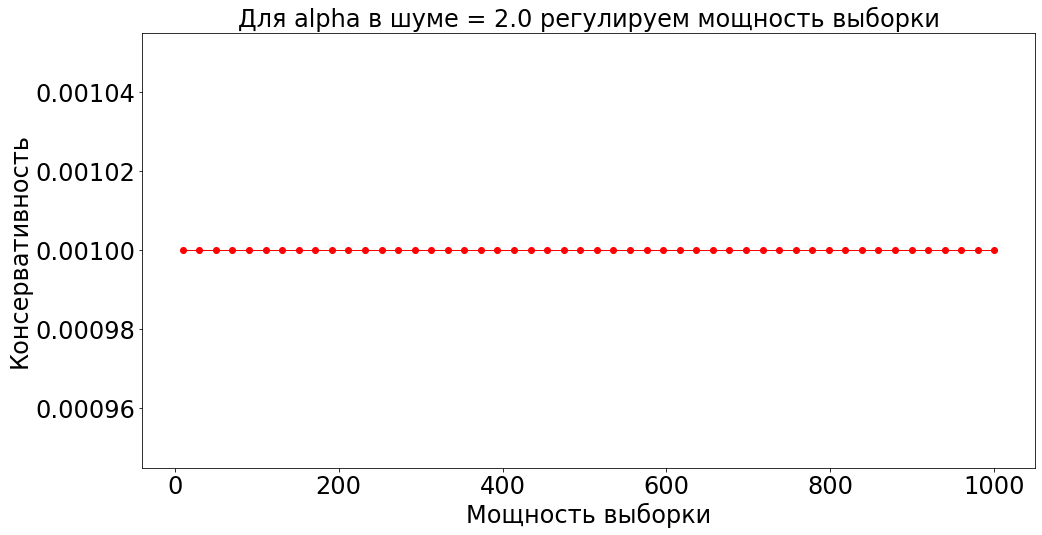

In [109]:
plt.plot(np.linspace(10, 1000, 50), res, 'ro-')
plt.xlabel('Мощность выборки')
plt.ylabel('Консервативность')
plt.title('Для alpha в шуме = 2.0 регулируем мощность выборки')
plt.show()

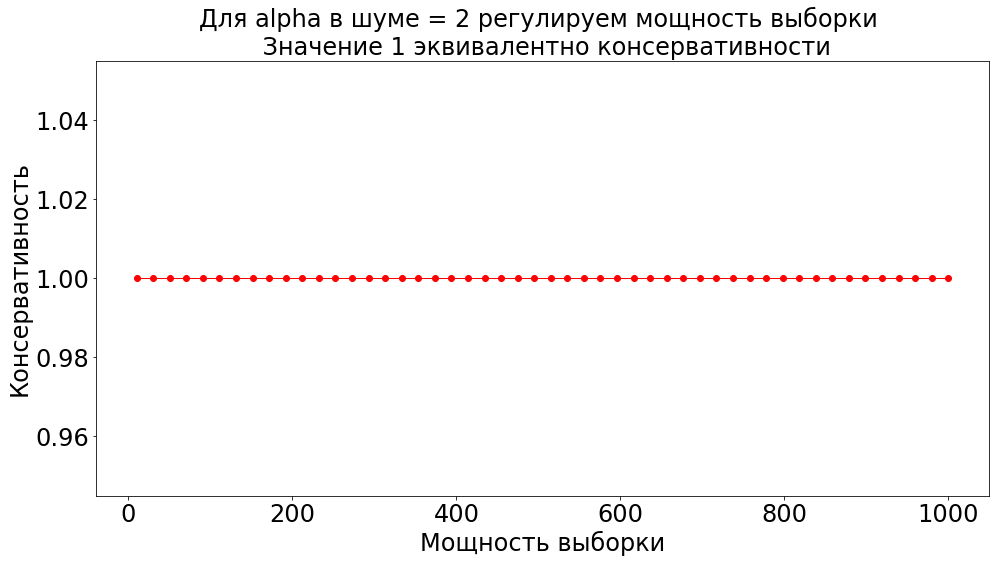

In [110]:
plt.plot(np.linspace(10, 1000, 50), np.where(np.array(res) <= 0.05, 1, 0), 'ro-')
plt.xlabel('Мощность выборки')
plt.ylabel('Консервативность')
plt.title('Для alpha в шуме = ' + str(noise) + ' регулируем мощность выборки \n Значение 1 эквивалентно консервативности')
plt.show()

Критерий выглядит консервативным. Попробуем поменять параметр $\alpha$ в шуме.

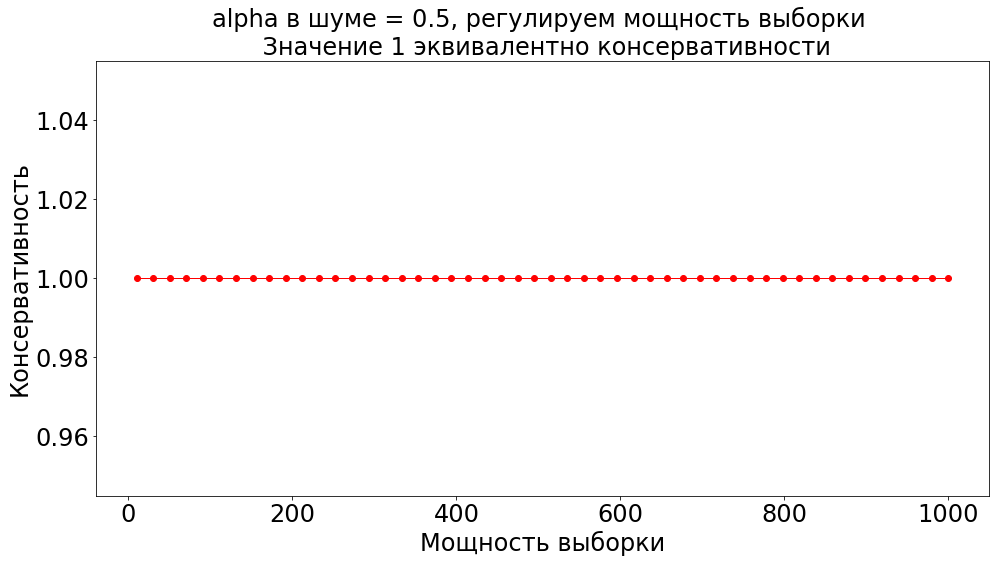

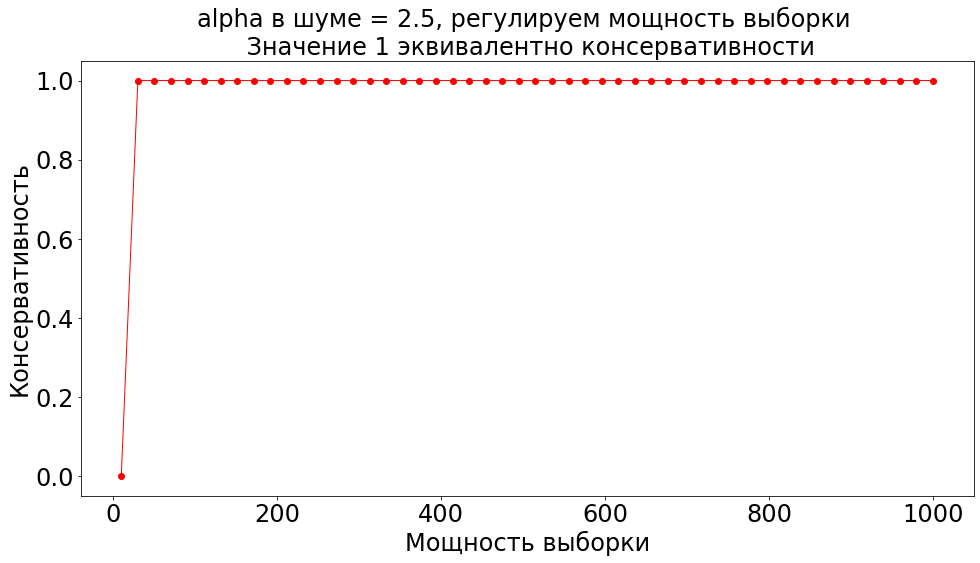

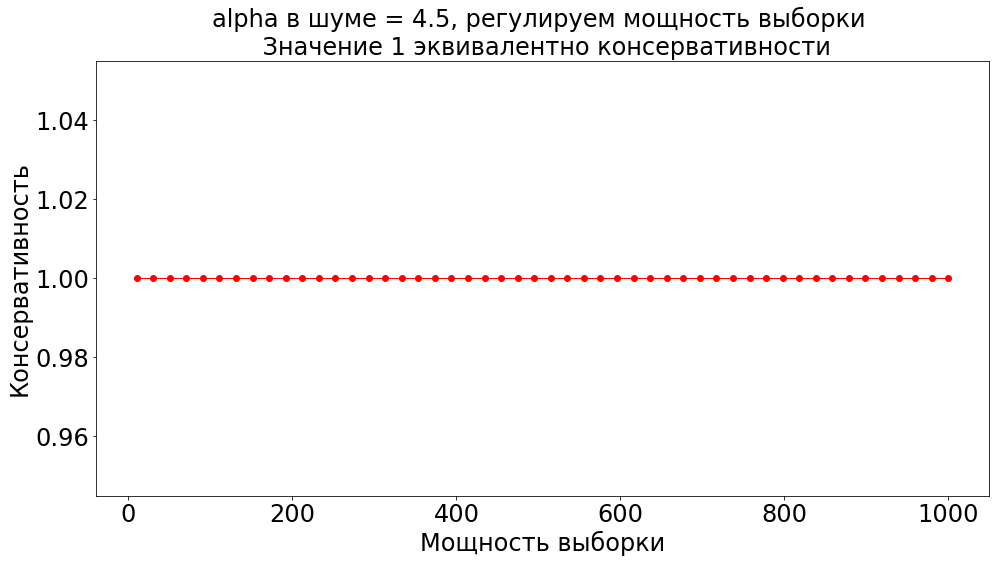

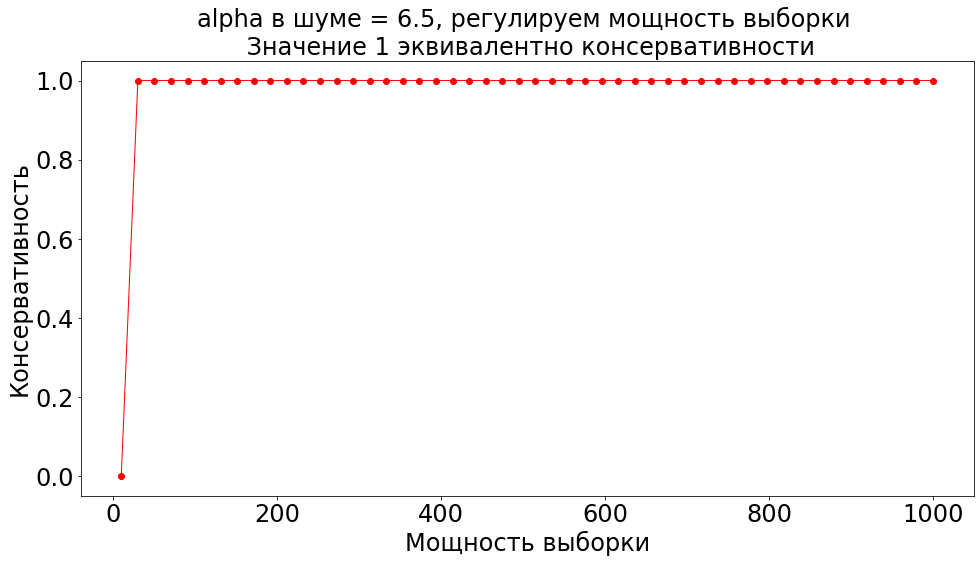

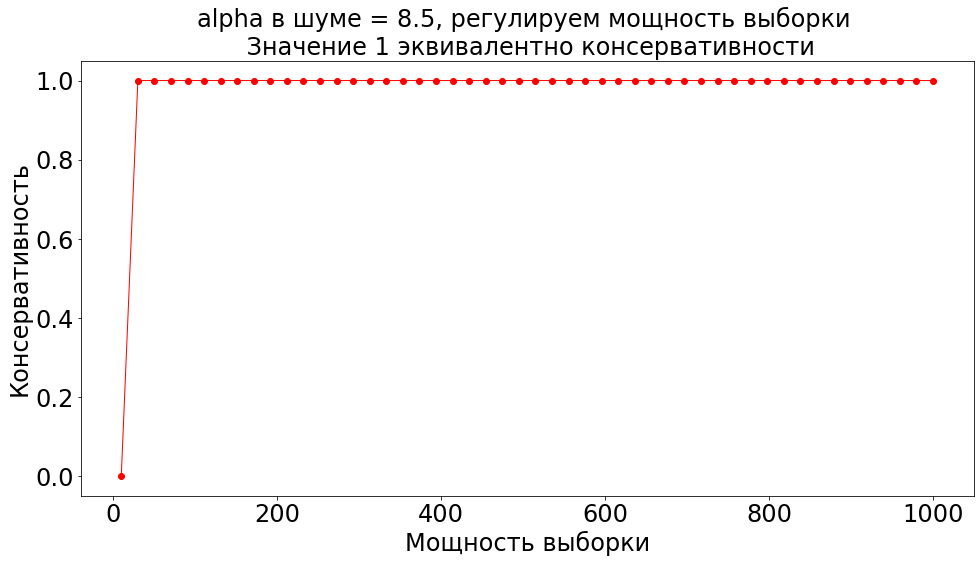

In [111]:
noises = np.arange(0.5, 10.0, 2)

for noise in noises:
    res = []
    corr = 1.0/np.sqrt(1+noise**2)

    for N in np.linspace(10, 1000, 50):
        res.append(z_test(N, noise=noise, given_correlation = corr, printed=False))
    
    plt.plot(np.linspace(10, 1000, 50), np.where(np.array(res) <= 0.05, 1, 0), 'ro-')
    plt.xlabel('Мощность выборки')
    plt.ylabel('Консервативность')
    plt.title('alpha в шуме = ' + str(noise) + ', регулируем мощность выборки \n Значение 1 эквивалентно консервативности')
    plt.show()

Интервал, в котором критерий не консервативен с увеличением размера выборки становится сужается?

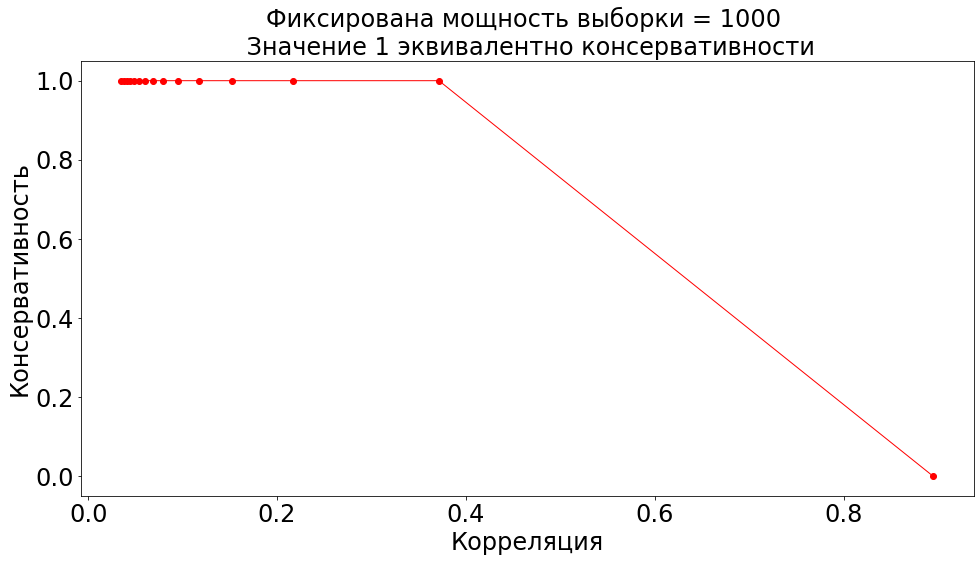

In [115]:
res = []
corrs = []
noises = np.arange(0.5, 30.0, 2)

for noise in noises:
    corrs.append(1.0/np.sqrt(1+noise**2))
    N = 1000
    res.append(z_test(N, m, given_correlation=corrs[-1], printed=False))
    
plt.plot(corrs, np.where(np.array(res) <= 0.05, 1, 0), 'ro-')
plt.xlabel('Корреляция')
plt.ylabel('Консервативность')
plt.title('Фиксирована мощность выборки = 1000 \n Значение 1 эквивалентно консервативности')
plt.show()

Что ж, чем меньше шум, тем больше корреляция. При увеличении корреляции критерий выглядит менее консервативным.

<ipython-input-114-f2e6ba958833>:15: RuntimeWarning: divide by zero encountered in arctanh
  Z = (np.arctanh(pearson) - np.arctanh(given_correlation))*np.sqrt(n-3)


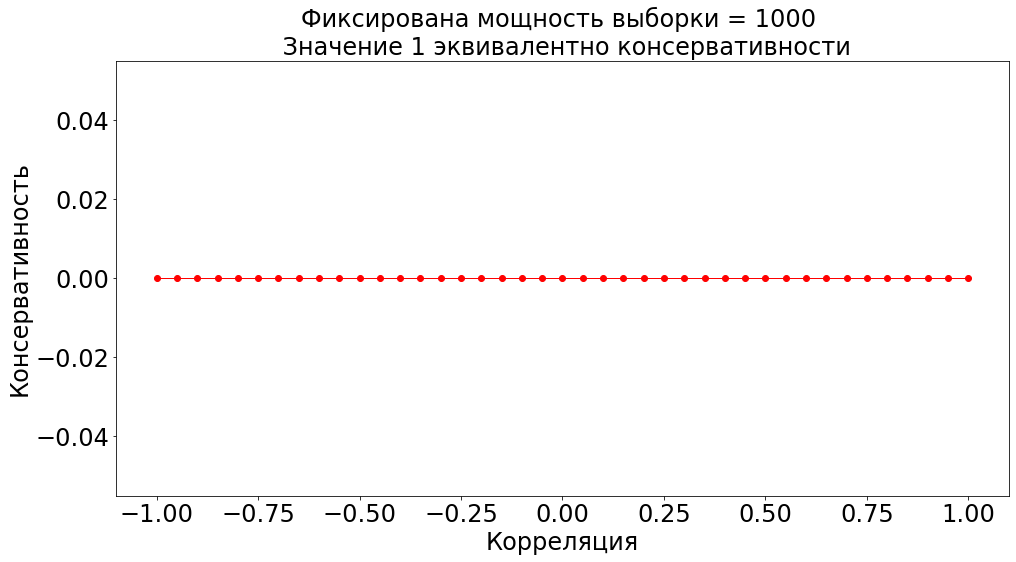

In [122]:
res = []
corrs = np.linspace(-1, 1, 41)
for corr in corrs:
    res.append(z_test(1000, m, given_correlation=corr, printed=False))
    
plt.plot(corrs, np.where(np.array(res) <= 0.05, 1, 0), 'ro-')
plt.xlabel('Корреляция')
plt.ylabel('Консервативность')
plt.title('Фиксирована мощность выборки = 1000 \n Значение 1 эквивалентно консервативности')
plt.show()

А если рассматривать два различных нормальных распределения без шума:

<ipython-input-127-b955f1f111ff>:13: RuntimeWarning: divide by zero encountered in arctanh
  Z = (np.arctanh(pearson) - np.arctanh(c)) * np.sqrt(n - 3)


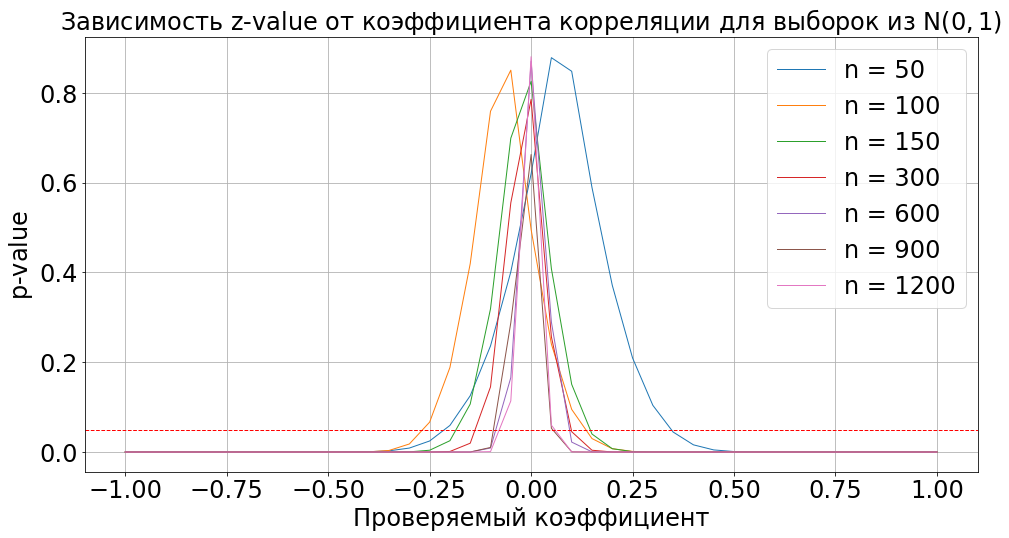

In [127]:
corrs = np.linspace(-1, 1, 41)
sizes = [50 * i for i in range(1, 4)] + [300 * i for i in range(1, 5)]
z_vals = {}
for n in sizes:
    np.random.seed(1)
    X1 = np.random.normal(0, 1, n)
    np.random.seed(2)
    X2 = np.random.normal(0, 1, n)

    pearson = st.pearsonr(X1, X2)[0]
    z_vals[n] = []
    for c in corrs:
        Z = (np.arctanh(pearson) - np.arctanh(c)) * np.sqrt(n - 3)
        z_vals[n].append(2 * (1 - st.distributions.norm.cdf(abs(Z))))

plt.title('Зависимость $z$-value от коэффициента корреляции для выборок из $\mathcal{N}(0, 1)$')
for n in z_vals:
    plt.plot(corrs, z_vals[n], label=f'n = {n}')
plt.axhline(0.05, c='red', linestyle='--')
plt.xlabel('Проверяемый коэффициент')
plt.ylabel('$p$-value')
plt.legend()
plt.grid()
plt.show()

Тут уже явно видно, что в зависимости от выборки, интервал коэффциентов корреляции, при которых тест консервативен сужается к нулю.